# test
train.ipynd는 따로 생성.

In [1]:
# 06딥러닝
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 분석
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-05-15 15:30:25.820098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 15:30:25.832854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747290625.846337   30238 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747290625.850184   30238 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747290625.860238   30238 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [11]:
data = pd.read_csv("./data/wine_train.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [6]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

In [7]:
# 결측체크
print(data.head())
print("data.info()")
print(data.info())

   와인_종류  알코올_도수  사과산_함량  재_함량  재의_알칼리도  마그네슘_함량  총_페놀_함량  플라보노이드_함량  \
0      1   13.76    1.53  2.70     19.5      132     2.95       2.74   
1      2   12.67    0.98  2.24     18.0       99     2.20       1.94   
2      1   13.58    1.66  2.36     19.1      106     2.86       3.19   
3      2   13.86    1.51  2.67     25.0       86     2.95       2.86   
4      1   13.05    2.05  3.22     25.0      124     2.63       2.68   

   비플라보노이드_페놀_함량  프로안토시아닌_함량  색_강도    색조  희석_와인의_투과율_OD280_OD315  프롤린_함량  
0           0.50        1.35  5.40  1.25                    3.00    1235  
1           0.30        1.46  2.62  1.23                    3.16     450  
2           0.22        1.95  6.90  1.09                    2.88    1515  
3           0.21        1.87  3.38  1.36                    3.16     410  
4           0.47        1.92  3.58  1.13                    3.20     830  
data.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):


<Axes: >

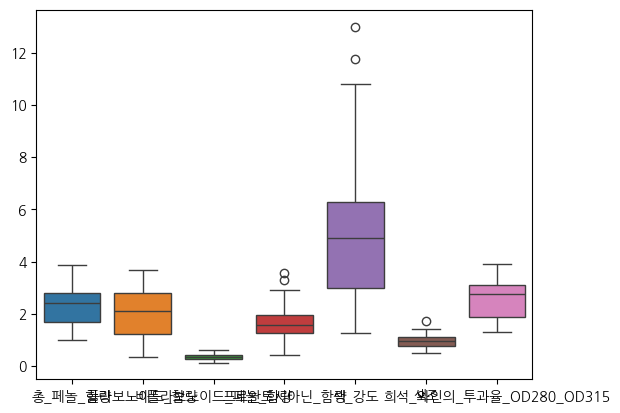

In [10]:
# 이상치 체크
sns.boxplot(data.iloc[:,6:-1]) ## 이정도면 별로없는편

In [51]:
## 와인종류가 종속변수인가? ㅇ0ㅇ
# Xy 할당
X = data.drop('와인_종류',axis=1)
y= data['와인_종류']
#X

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
## 혹시몰라서 stratify를 넣는다는게 무슨뜻일깡
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)


IndexError: tuple index out of range

In [27]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms=MinMaxScaler() # 메모리상에 있는 존재인데 mms를 저장해야함
X_train_temp = mms.fit_transform(X_train)
X_test_temp = mms.transform(X_test)

mms_X_train = pd.DataFrame(X_train_temp, columns=X_train.columns, index=X_train.index)
mms_X_test= pd.DataFrame(X_test_temp, columns=X_test.columns, index=X_test.index)



In [33]:
# 확인용
mms_X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
90,0.839474,0.159836,0.505376,0.347561,0.435897,0.750000,0.784375,0.244898,0.562937,0.435154,0.373984,0.764479,0.559418
31,0.471053,0.502049,0.505376,0.542683,0.051282,0.088462,0.053125,0.530612,0.192308,0.766212,0.195122,0.162162,0.329022
97,0.750000,0.844262,0.467742,0.573171,-0.051282,-0.103846,-0.046875,0.530612,0.090909,0.308874,0.081301,0.000000,0.110752
96,0.273684,0.254098,0.435484,0.634146,0.012821,0.519231,0.675000,0.469388,0.325175,0.126280,0.308943,0.752896,0.080841
12,0.310526,0.055328,0.209677,0.378049,0.858974,0.230769,0.246875,0.000000,0.727273,0.133959,0.650407,0.671815,0.355699
61,0.486842,0.424180,0.559140,0.573171,0.256410,0.019231,0.228125,0.204082,0.143357,0.351536,0.211382,0.034749,0.203719
64,0.884211,0.194672,0.586022,0.243902,0.153846,0.480769,0.634375,0.326531,0.545455,0.338737,0.439024,0.868726,0.818108
38,0.594737,0.215164,0.709677,0.378049,0.230769,0.673077,0.856250,0.346939,0.433566,0.402730,0.479675,0.583012,0.801940
42,0.352632,0.059426,0.645161,0.457317,0.179487,0.450000,0.675000,0.469388,0.580420,0.283276,0.577236,0.374517,0.323363
34,0.352632,0.051230,0.301075,0.548780,-0.076923,0.330769,0.471875,0.265306,0.216783,0.290102,0.520325,0.830116,0.187551


In [34]:
# 확인용
mms_X_train

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
77,0.476316,0.418033,0.672043,0.817073,0.217949,0.411538,0.034375,0.795918,0.136364,0.310580,0.333333,0.316602,0.252223
20,0.207895,0.163934,0.279570,0.542683,0.025641,0.480769,0.359375,0.469388,0.349650,0.066553,0.373984,0.428571,0.110752
24,0.644737,0.153689,0.688172,0.725610,0.064103,0.519231,0.190625,0.775510,0.653846,0.893345,0.073171,0.173745,0.276475
85,0.507895,0.518443,0.532258,0.481707,0.282051,0.053846,0.065625,0.530612,0.181818,0.341297,0.162602,0.162162,0.320938
32,0.684211,0.182377,0.720430,0.402439,0.358974,0.615385,0.756250,0.326531,0.363636,0.513652,0.650407,0.598456,0.834276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.539474,0.610656,0.537634,0.664634,0.371795,0.061538,0.281250,0.408163,0.251748,0.692833,0.073171,0.000000,0.219887
80,0.423684,0.090164,0.354839,0.378049,0.205128,0.296154,0.287500,0.795918,0.069930,0.381399,0.406504,0.100386,0.139046
33,0.621053,0.174180,0.677419,0.335366,0.115385,0.615385,0.765625,0.408163,0.360140,0.300341,0.357724,0.729730,0.741310
9,1.000000,0.147541,0.435484,0.207317,0.166667,0.596154,0.778125,0.306122,0.545455,0.334471,0.487805,0.586873,0.620049


In [36]:
# y데이터의 1핫인코딩
y_train.value_counts() # y밸류의 종류는3가지로 확인

와인_종류
2    25
1    21
3    17
Name: count, dtype: int64

In [63]:
## 원핫인코딩
y_train=pd.get_dummies(y_train)

In [64]:
## 원핫인코딩
y_test=pd.get_dummies(y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
## 
n_class=y_train.shape[1]

model = Sequential()   
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(n_class, activation='softmax'))
model.summary()

I0000 00:00:1747294839.645548   30238 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,555 (13.89 KB)

 Trainable params: 3,555 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


I0000 00:00:1747295462.180748   30458 service.cc:152] XLA service 0x7f6ad400aa70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747295462.180797   30458 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-15 16:51:02.217946: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747295462.514817   30458 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/4 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.2500 - loss: 1.1087

I0000 00:00:1747295465.527089   30458 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3252 - loss: 1.0945 - val_accuracy: 0.4091 - val_loss: 1.0449
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4170 - loss: 1.0403 - val_accuracy: 0.4091 - val_loss: 1.0192
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3878 - loss: 1.0257 - val_accuracy: 0.4091 - val_loss: 0.9954
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3565 - loss: 1.0061 - val_accuracy: 0.4091 - val_loss: 0.9762
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4318 - loss: 0.9791 - val_accuracy: 0.5455 - val_loss: 0.9544
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4028 - loss: 0.9733 - val_accuracy: 0.5909 - val_loss: 0.9292
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5931 - loss: 0.8977 - val_accuracy: 0.7727 - val_loss: 0.8990
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5872 - loss: 0.9099 - val_accuracy: 0.9091 - val_loss: 0.870

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0224 - val_accuracy: 0.9091 - val_loss: 0.1424
Epoch 52/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0209 - val_accuracy: 0.9091 - val_loss: 0.1402
Epoch 53/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.9091 - val_loss: 0.1394
Epoch 54/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9091 - val_loss: 0.1345
Epoch 55/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.9091 - val_loss: 0.1279
Epoch 56/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.9091 - val_loss: 0.1418
Epoch 57/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.9091 - val_loss: 0.1477
Epoch 58/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.9091 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9091 - val_loss: 0.1429
Epoch 102/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9091 - val_loss: 0.1438
Epoch 103/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9091 - val_loss: 0.1431
Epoch 104/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9091 - val_loss: 0.1392
Epoch 105/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9091 - val_loss: 0.1395
Epoch 106/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9091 - val_loss: 0.1417
Epoch 107/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.9091 - val_loss: 0.1432
Epoch 108/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9091 - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9091 - val_loss: 0.1459
Epoch 152/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9091 - val_loss: 0.1432
Epoch 153/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9091 - val_loss: 0.1446
Epoch 154/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9091 - val_loss: 0.1475
Epoch 155/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9091 - val_loss: 0.1506
Epoch 156/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9091 - val_loss: 0.1505
Epoch 157/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9091 - val_loss: 0.1477
Epoch 158/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9091 - 

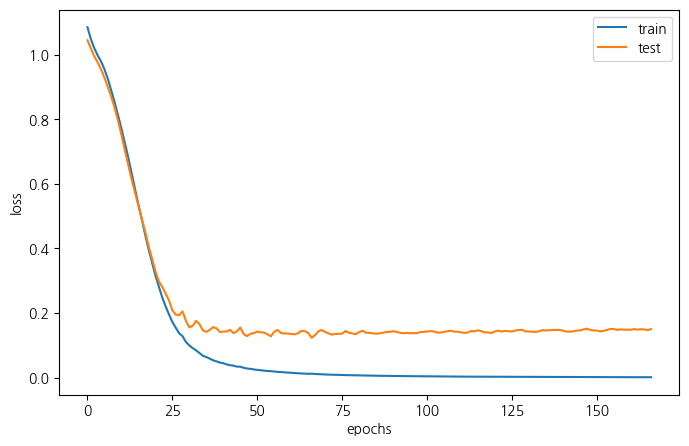

In [42]:
## 컴파일 - 파라미터 지정

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

early_stop= EarlyStopping(patience=100)

file_path="./model/wine_best_model.keras"
## 파일명에 loss수치를 나타낼것인지
#"./model/wine_{val_loss:.4f}_{epoch:04d}.keras"

model_save= ModelCheckpoint(filepath=file_path, save_best_only=True)

history= model.fit(mms_X_train, y_train,
                  epochs=1000, batch_size=16,
                  validation_data=(mms_X_test, y_test),
                  callbacks=[early_stop, model_save])

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'])
plt.show()

# Train 데이터와 test데이터 같은 작업해주기
- 스케일링: minMaxScaler 
- 홀드아웃: train, valid, test
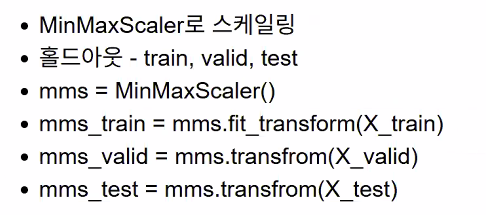
여기서 스케일링할때 
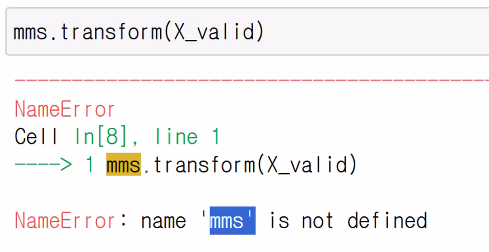
mms를 쓸수가 없는 문제가 생김
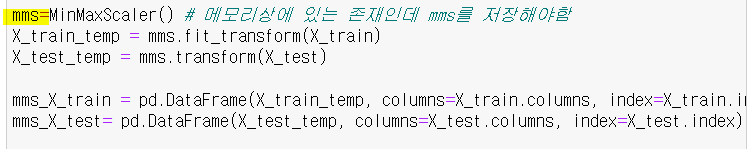
# joblib을 통해 저장
mms변수(MinMaxScaler)가중치 저장
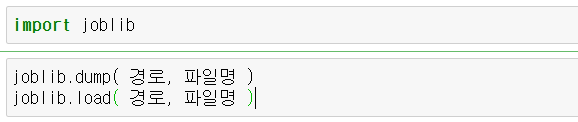

In [60]:
## test데이터
# test데이터는 한번 돌리고나서 끝이니까
X_test = data.drop('와인_종류',axis=1) # 아직 스케일링 전
y_test = data['와인_종류'] # 타겟이라 스케일링x


In [55]:
import joblib

In [45]:
joblib.dump(mms, "./model/MinMax_info.joblib" ) #아무 확장자나 다되나? d0d

['./model/MinMax_info.joblib']

In [52]:
mms = joblib.load("./model/MinMax_info.joblib") # 모델생성시의 가중치 그대로 사용할것.
X_test_temp = mms.transform(X_test)
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns) #인덱스는 유지가능

### 테스트 데이터에서는 가중치가 달라지지 않도록 주의해야함

In [48]:
# 이제 best모델 불러와 예측
from keras.models import load_model

In [61]:
best_model = load_model("./model/wine_best_model.keras")
result = best_model.evaluate(X_test,y_test)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 3)

# 랜덤포레스트 모델 불러와 분석

In [53]:
from sklearn.metrics import classification_report

In [62]:
y_test

0      1
1      2
2      1
3      2
4      1
      ..
101    2
102    3
103    1
104    2
105    2
Name: 와인_종류, Length: 106, dtype: int64

In [65]:
rfc = joblib.load("./model/rfc_model.joblib")
pred=rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        35
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        29

   micro avg       0.33      0.33      0.33       106
   macro avg       0.11      0.33      0.17       106
weighted avg       0.11      0.33      0.16       106
 samples avg       0.33      0.33      0.33       106



/home/fintech/miniforge3/envs/fintech/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
